In [1]:
%matplotlib inline
from pylab import *
from Game import *
from Game.minimax import *
inf=1e500

Version:  0.3.03


In [2]:
def initial_state():
    return 6

def valid_moves(state,player):
    if state==2:
        return [1,2]
    elif state==1:
        return [1]
    else:
        return [1,2,3 ]

def update_state(state,player,move):
    new_state=state-move
    return new_state

def win_status(new_state,player):
    
    if new_state==1:
        return "win"
    
    if new_state==0:
        return "lose"
    
    return None
    
def show_state(state,player):
    print(state)

In [3]:
def walk(current_state,player,depth=0,counts={},maxdepth=inf):
    
    if player==1:
        other_player=2
    else:
        other_player=1

    if depth>maxdepth:
        return 


    print("\t"*depth,current_state)
    
    # since win_status is called with a player and an updated state
    # the current state is really the updated state from the
    # other player's last move.

    status=win_status(current_state,other_player)
    if not status in ['win','lose','stalemate',None]:
        raise ValueError("Win status returned '%s' not valid.  Allowed values only in ['win','lose','stalemate',None]." % status)

    if status=='win':  # bad for min
        return
    elif status=='lose':  # good for min
        return
    elif status=='stalemate':  # draw
        return


    moves=valid_moves(current_state,player)
    if moves is None:
        raise ValueError("valid_moves returned None with state=%s and player=%d - Did you forget to return the moves?" % (str(current_state),player))
    available_states=[update_state(deepcopy(current_state),player,move)
                                for move in moves]
    
    values=[]
    for state in available_states:
        walk(state,other_player,depth+1,counts,maxdepth)

    

In [4]:
walk(6,1)

 6
	 5
		 4
			 3
				 2
					 1
					 0
				 1
				 0
			 2
				 1
				 0
			 1
		 3
			 2
				 1
				 0
			 1
			 0
		 2
			 1
			 0
	 4
		 3
			 2
				 1
				 0
			 1
			 0
		 2
			 1
			 0
		 1
	 3
		 2
			 1
			 0
		 1
		 0


In [5]:
m=5 # 1/2 minimum horiztonal extent
h=10 # vertical displacement

class Node():

    def __init__(self,value):
        self.value=value
        self.children=[]
        self.parent=None
        self.x=0
        self.y=0
        self.abs_xy=None
        self.ext=[-m,m]

    def __iadd__(self,y):
        try:
            for item in y:
                self.children.append(item)
                item.parent=self
        except TypeError:
            self.children.append(y)

        return self

A,B,C,D,E,F=Node('A'),Node('B'),Node('C'),Node('D'),Node('E'),Node('F')

A+=B,C
B+=D,E
C+=F


# Function to traverse the tree
def traverse(node,depth=0):
    print("\t"*depth,node.value,node.x,node.y,node.ext)
    for child in node.children:
        traverse(child,depth+1)

traverse(A)  # Start traversal from root A

 A 0 0 [-5, 5]
	 B 0 0 [-5, 5]
		 D 0 0 [-5, 5]
		 E 0 0 [-5, 5]
	 C 0 0 [-5, 5]
		 F 0 0 [-5, 5]


In [6]:
A,B,C,D,E,F=Node('A'),Node('B'),Node('C'),Node('D'),Node('E'),Node('F')
A+=B,C
B+=D,E
C+=F
traverse(A) 

 A 0 0 [-5, 5]
	 B 0 0 [-5, 5]
		 D 0 0 [-5, 5]
		 E 0 0 [-5, 5]
	 C 0 0 [-5, 5]
		 F 0 0 [-5, 5]


In [7]:
def get_xy(node):
    import numpy as np
    
    if node.abs_xy is None:
        adjust_extents(node)
    x=[]
    y=[]
    labels=[]
     
    def _traverse(node,parent_x=0,depth=0):
        node.abs_xy=[node.x+parent_x,-node.y]
        x.append(node.x+parent_x)
        y.append(-node.y)
        labels.append(str(node.value))
        for child in node.children:
            _traverse(child,node.x+parent_x,depth+1)
            
    _traverse(node)   

    return np.array(x),np.array(y),labels

In [8]:
def adjust_extents(node,depth=0):

    node.y=h*depth

    if not node.children:
        node.x=0
        node.ext=[-m,m]
        return

    for c in node.children:
        adjust_extents(c,depth+1)    

    cdf=0
    for c in node.children:
        df=c.ext[1]-c.ext[0]
        c.x=cdf+df/2
        cdf+=df

    for c in node.children:
        c.x-=cdf/2

    node.ext=[-cdf/2,+cdf/2]

In [9]:
A,B,C,D,E,F=Node('A'),Node('B'),Node('C'),Node('D'),Node('E'),Node('F')
A+=B,C
B+=D,E
C+=F
traverse(A) 

 A 0 0 [-5, 5]
	 B 0 0 [-5, 5]
		 D 0 0 [-5, 5]
		 E 0 0 [-5, 5]
	 C 0 0 [-5, 5]
		 F 0 0 [-5, 5]


In [10]:
def get_lines(node):
    import numpy as np
    if node.abs_xy is None:
        adjust_extents(node)

    x=[]
    y=[]

    def _traverse(node,parent_x=0,depth=0):        
        for child in node.children:
            x.append([node.abs_xy[0]])
            y.append([node.abs_xy[1]])
            x.append([child.abs_xy[0]])
            y.append([child.abs_xy[1]])
            x.append([np.nan])
            y.append([np.nan])

            _traverse(child)
    _traverse(node)            

    return np.array(x),np.array(y)
    

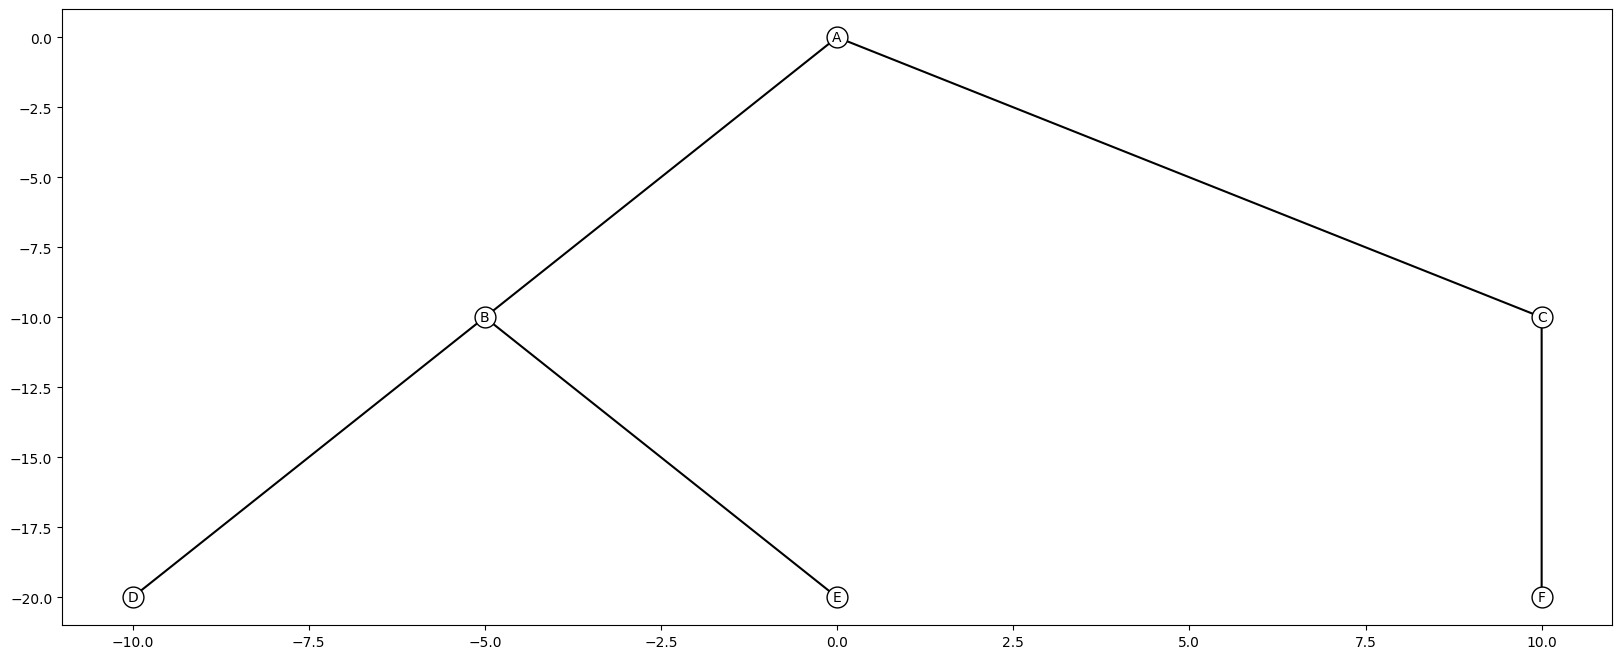

In [11]:
A,B,C,D,E,F=Node('A'),Node('B'),Node('C'),Node('D'),Node('E'),Node('F')
A+=B,C
B+=D,E
C+=F

adjust_extents(A)
x,y,labels=get_xy(A)
xl,yl=get_lines(A)
figure(figsize=(20,8))
plot(xl,yl,'k-')
plot(x,y,'o',color='white',markeredgecolor='black',markersize=15)
for xx,yy,L in zip(x,y,labels):
    text(xx,yy,L,ha='center',va='center',color='black')

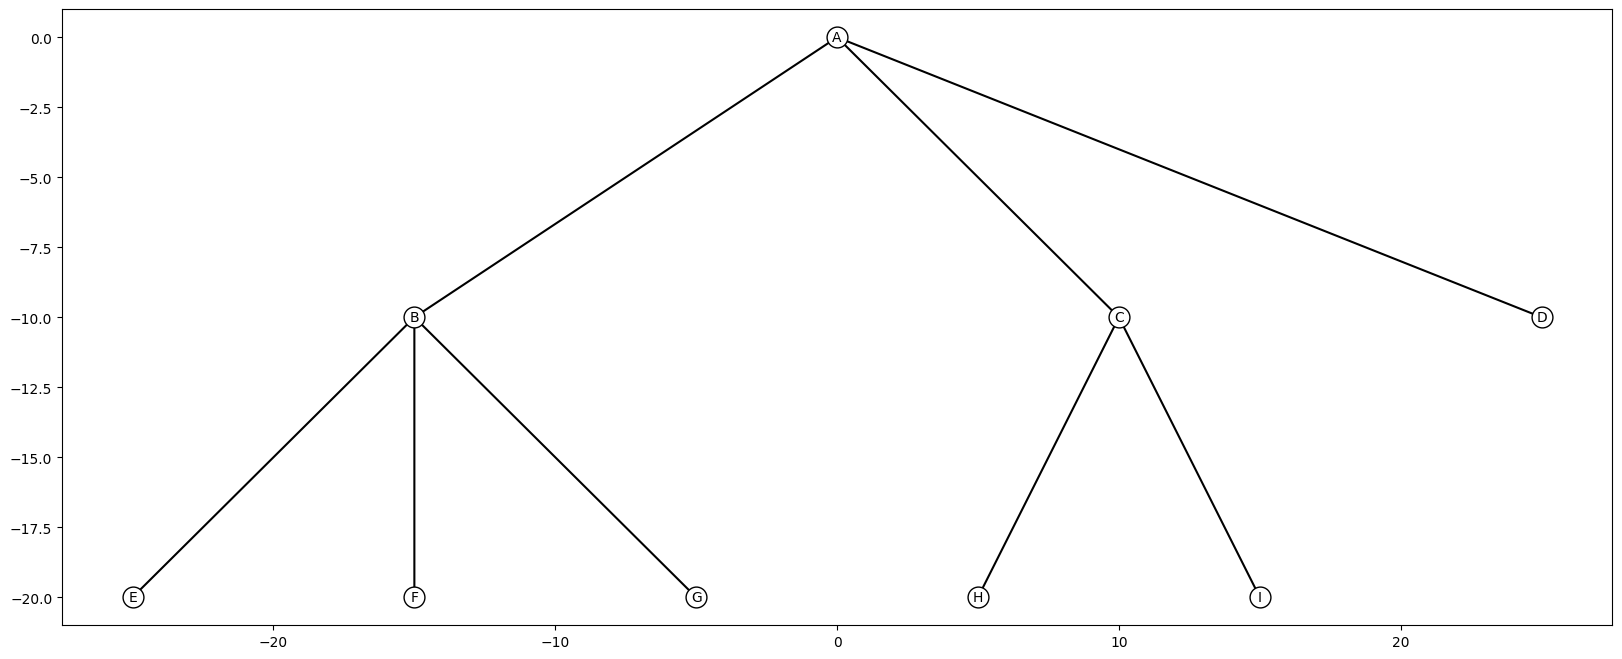

In [12]:
nodes={k:Node(k) for k in 'ABCDEFGHI'}

nodes['A']+=[nodes[k] for k in 'BCD']
nodes['B']+=[nodes[k] for k in 'EFG']
nodes['C']+=[nodes[k] for k in 'HI']
A=nodes['A']

x,y,labels=get_xy(A)
xl,yl=get_lines(A)
figure(figsize=(20,8))
plot(xl,yl,'k-')
plot(x,y,'o',color='white',markeredgecolor='black',markersize=15)
for xx,yy,L in zip(x,y,labels):
    text(xx,yy,L,ha='center',va='center',color='black')

In [13]:
traverse(A)

 A 0 0 [-30.0, 30.0]
	 B -15.0 10 [-15.0, 15.0]
		 E -10.0 20 [-5, 5]
		 F 0.0 20 [-5, 5]
		 G 10.0 20 [-5, 5]
	 C 10.0 10 [-10.0, 10.0]
		 H -5.0 20 [-5, 5]
		 I 5.0 20 [-5, 5]
	 D 25.0 10 [-5, 5]


In [14]:
D.abs_xy

[-10.0, -20]

In [15]:
def tree(current_state,player,depth=0,maxdepth=inf):

    node=Node(deepcopy(current_state))
    
    if player==1:
        other_player=2
    else:
        other_player=1

    if depth>maxdepth:
        return 
    
    # since win_status is called with a player and an updated state
    # the current state is really the updated state from the
    # other player's last move.

    status=win_status(current_state,other_player)
    if not status in ['win','lose','stalemate',None]:
        raise ValueError("Win status returned '%s' not valid.  Allowed values only in ['win','lose','stalemate',None]." % status)

    if status=='win':  # bad for min
        return node
    elif status=='lose':  # good for min
        return node
    elif status=='stalemate':  # draw
        return node


    moves=valid_moves(current_state,player)
    if moves is None:
        raise ValueError("valid_moves returned None with state=%s and player=%d - Did you forget to return the moves?" % (str(current_state),player))
    available_states=[update_state(deepcopy(current_state),player,move)
                                for move in moves]
    
    for state in available_states:
        node+=tree(state,other_player,depth+1,maxdepth)

    return node
    

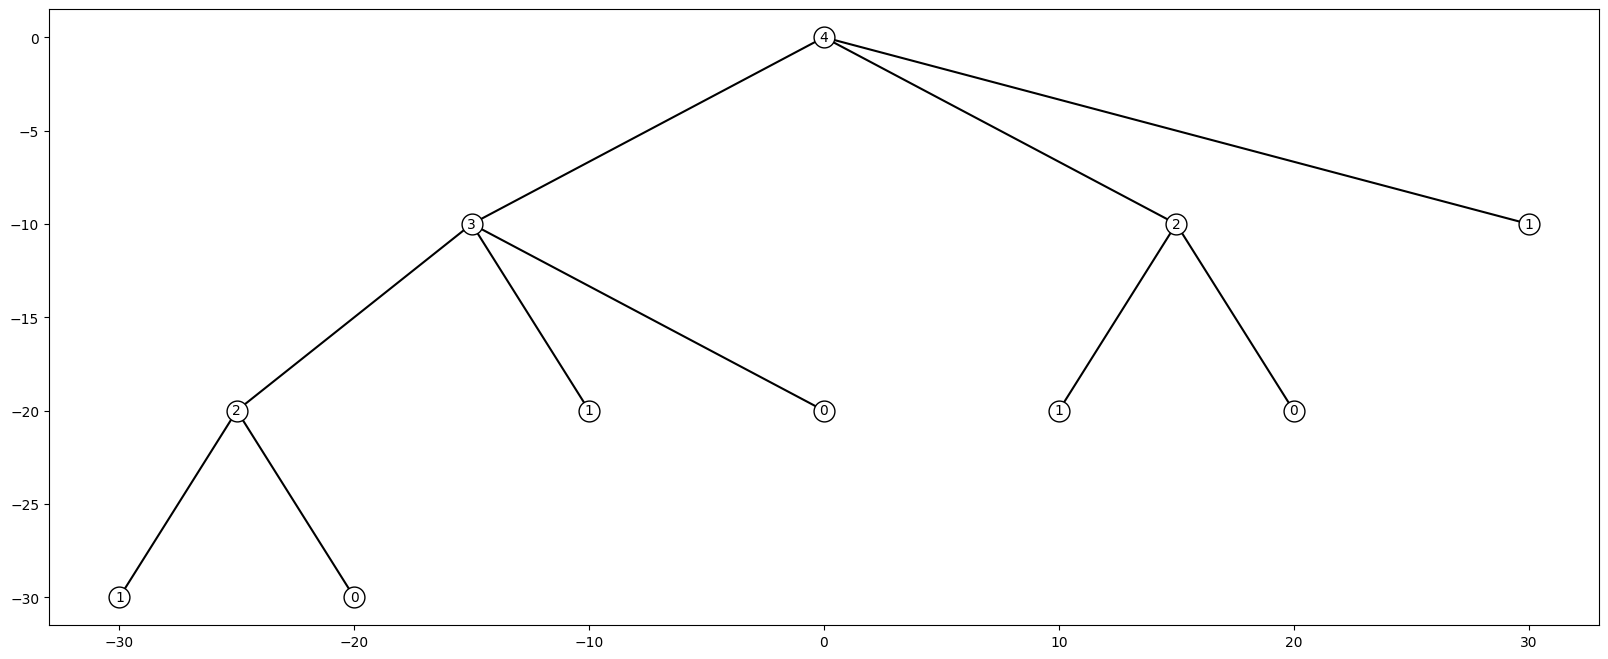

In [16]:
node=tree(4,1)
x,y,labels=get_xy(node)
xl,yl=get_lines(node)
figure(figsize=(20,8))
plot(xl,yl,'k-')
plot(x,y,'o',color='white',markeredgecolor='black',markersize=15)
for xx,yy,L in zip(x,y,labels):
    text(xx,yy,L,ha='center',va='center',color='black')

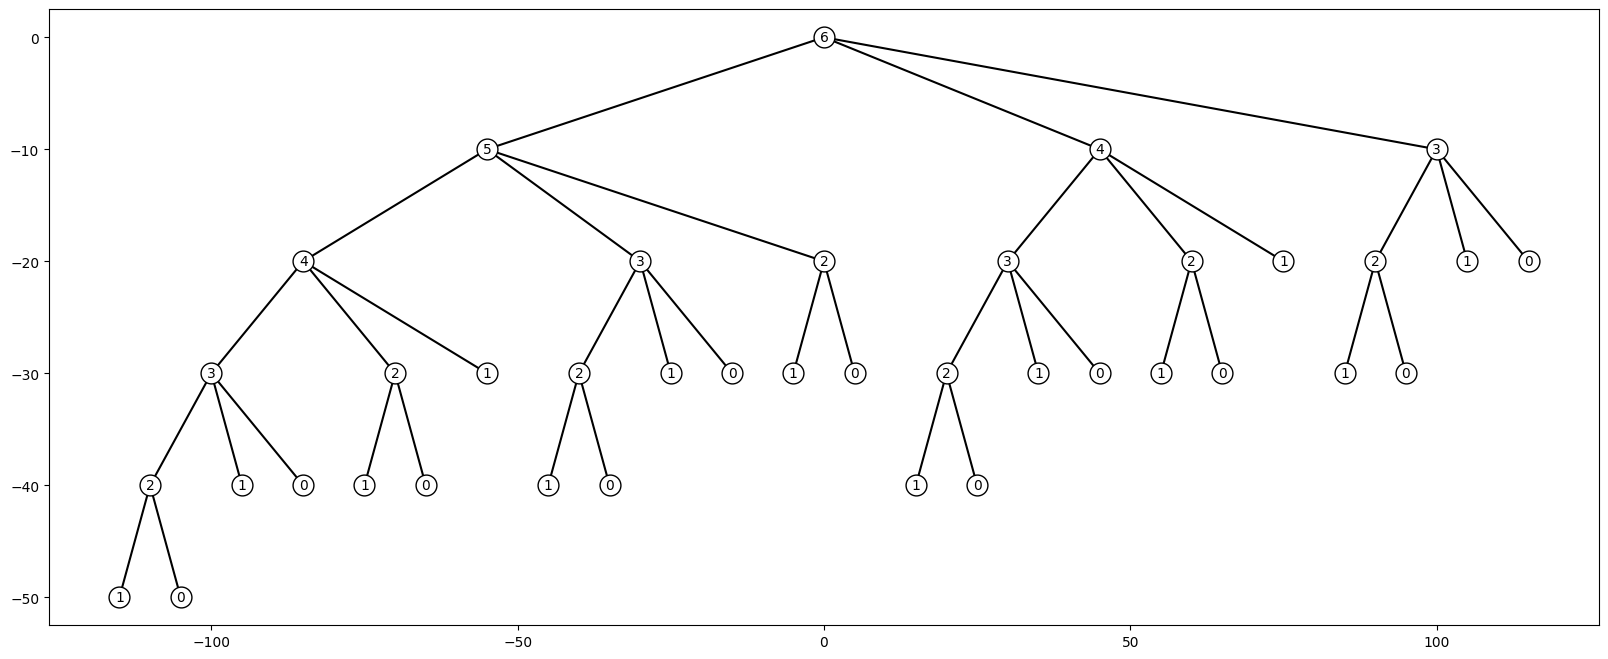

In [20]:
node=tree(6,1)
x,y,labels=get_xy(node)
xl,yl=get_lines(node)
figure(figsize=(20,8))
plot(xl,yl,'k-')
plot(x,y,'o',color='white',markeredgecolor='black',markersize=15)
for xx,yy,L in zip(x,y,labels):
    text(xx,yy,L,ha='center',va='center',color='black')